## Final Project Submission

Please fill out:
* Student name: Farnaz Golnam
* Student pace: Full time
* Scheduled project review date/time: Feb 24th, 12pm PST
* Instructor name: Rafael Cassaro
* Blog post URL: https://datasciencefordesigners.wordpress.com/2020/01/27/data-driven-decision-making/

# Modeling Process:
1. Importing libraries and available data set.
2. Data preprocessing for the linear regression modeling.
3. feature selection.
4. creating the model.
5. validating and interpreting the results.

# 1.Importing libraries and available data set:

In [2]:
#Datarames and Computation
import numpy as np
import pandas as pd

#Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#STATSMODELS
#statistical analysis & regression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

#SCIKIT LEARN
#metrics
from sklearn.metrics import mean_squared_error
#linear regression
from sklearn.linear_model import LinearRegression
#linreg = LinearRegression()

#label encoding
from sklearn.preprocessing import LabelEncoder
#lb_make = LabelEncoder()

#create dummy variables
from sklearn.preprocessing import LabelBinarizer
#lb_bin = LabelBinarizer()

#recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

#train test split
from sklearn.model_selection import train_test_split

#k-fold cross validation
from sklearn.model_selection import cross_val_score

#PICKLE for saving objects
import pickle

In [3]:
with open('df_clean.pickle','rb') as f:
    df_clean = pickle.load(f)

In [4]:
df_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15
1,538000.0,3,2.0,2570,7242,2.0,0.0,0.0,7,2170,400.0,1991.0,47.7210,-122.319,1690,7639
2,180000.0,2,1.0,770,10000,1.0,0.0,0.0,6,770,0.0,1933.0,47.7379,-122.233,2720,8062
3,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,7,1050,910.0,1965.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,8,1680,0.0,1987.0,47.6168,-122.045,1800,7503
7,291850.0,3,1.5,1060,9711,1.0,0.0,0.0,7,1060,0.0,1963.0,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.5,1310,1294,2.0,0.0,0.0,8,1180,130.0,2008.0,47.5773,-122.409,1330,1265
21592,360000.0,3,2.5,1530,1131,3.0,0.0,0.0,8,1530,0.0,2009.0,47.6993,-122.346,1530,1509
21593,400000.0,4,2.5,2310,5813,2.0,0.0,0.0,8,2310,0.0,2014.0,47.5107,-122.362,1830,7200
21594,402101.0,2,0.5,1020,1350,2.0,0.0,0.0,7,1020,0.0,2009.0,47.5944,-122.299,1020,2007


# 2.Data preprocessing for the linear regression:
we have to deliver the requirements of linear reqression:

## Linear Regression Assumptions:

### a. Multicolliniearity of features : we will check that through heatmaps
Because the idea behind regression is that you can change one variable and keep the others constant, correlation is a problem, because it indicates that changes in one predictor are associated with changes in another one as well. So we will remove predictors that are highly correlated with others.

### b. distributions of the predictors: we will check thet through histograms
when we have non-normal distributions in our data set, one common option for transforming non-normal variable distributions is to try applying a logarithmic function(Log Transformations).

### c. Categorical variables: we will check that through histograms:
When you want to use categorical variables in regression models, they need to be transformed. There are two approaches to this:

Perform label encoding

Create dummy variables / one-hot-encoding

# 2a) check for multicollinearity of features:

First we need to check for relationships between variables. One easy way to start this process is by graphing a correlation heatmap that will visually display how correlated every variable is to each others. 

(16.0, 0.0)

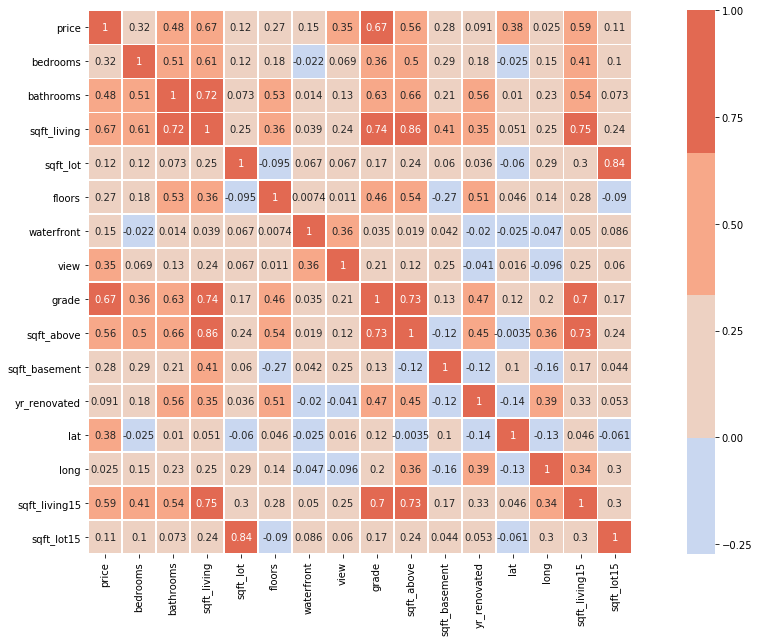

In [5]:
#Heatmap of all correlation coefficients
plt.figure(figsize=(20,10))
ax= sns.heatmap(df_clean.corr(), annot=True, cmap=sns.color_palette('coolwarm'), center=0, linewidths=.5, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [6]:
df_clean.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.668374
sqft_living      0.665514
sqft_living15    0.587540
sqft_above       0.563780
bathrooms        0.477295
lat              0.379673
view             0.350012
bedrooms         0.318814
sqft_basement    0.284592
floors           0.273651
waterfront       0.154395
sqft_lot         0.119918
sqft_lot15       0.112274
yr_renovated     0.090887
long             0.024731
Name: price, dtype: float64

# Observation:
### 1. features that have the most effect on the price are by order:
>"grade" , "sqft_living" , sqft_living15" , "sqft_above" , "bathrooms" , "lat" , "view" , "bedrooms" , "sqft_basement" , "floors"
### 2. among these feature some have high correlation with each other, Generally, a correlation with an absolute value around 0.7-0.8 or higher is considered a high correlation. we decide to drop any feature >= 0.75.

>sqft_above & sqft_living : 0.86

>sqft_above & sqft_living15 : 0.73

>sqft_above & grade : 0.73

#### we will drop sqft_above(square footage of house apart from basement) which is mostly simillar to sqft_living(square footage of the home), also we are going to consider the affect of sqft_basement on the price as well and we dont miss informative data.


>sqft_living & sqft_living15: 0.75

>sqft_living & grade : 0.74

>sqft_living & bathrooms : 0.72

>sqft_living15 & grade : 0.7

#### the sqft_living15 has less affect on price than sqft_living, so we will drop sqft_living15 and will keep the other one.


>sqft_lot & sqft_lot15 : 0.84

#### we will drop sqft_lot15 as it has less affect on price.

In [7]:
#df_clean1=df_clean.copy(deep=True)
df_clean=df_clean.drop(["sqft_above","sqft_living15","sqft_lot15"], axis=1, inplace=False)
df_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_basement,yr_renovated,lat,long
1,538000.0,3,2.0,2570,7242,2.0,0.0,0.0,7,400.0,1991.0,47.7210,-122.319
2,180000.0,2,1.0,770,10000,1.0,0.0,0.0,6,0.0,1933.0,47.7379,-122.233
3,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,7,910.0,1965.0,47.5208,-122.393
4,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,8,0.0,1987.0,47.6168,-122.045
7,291850.0,3,1.5,1060,9711,1.0,0.0,0.0,7,0.0,1963.0,47.4095,-122.315
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.5,1310,1294,2.0,0.0,0.0,8,130.0,2008.0,47.5773,-122.409
21592,360000.0,3,2.5,1530,1131,3.0,0.0,0.0,8,0.0,2009.0,47.6993,-122.346
21593,400000.0,4,2.5,2310,5813,2.0,0.0,0.0,8,0.0,2014.0,47.5107,-122.362
21594,402101.0,2,0.5,1020,1350,2.0,0.0,0.0,7,0.0,2009.0,47.5944,-122.299


### double check the output after dropping the collinear features:

(13.0, 0.0)

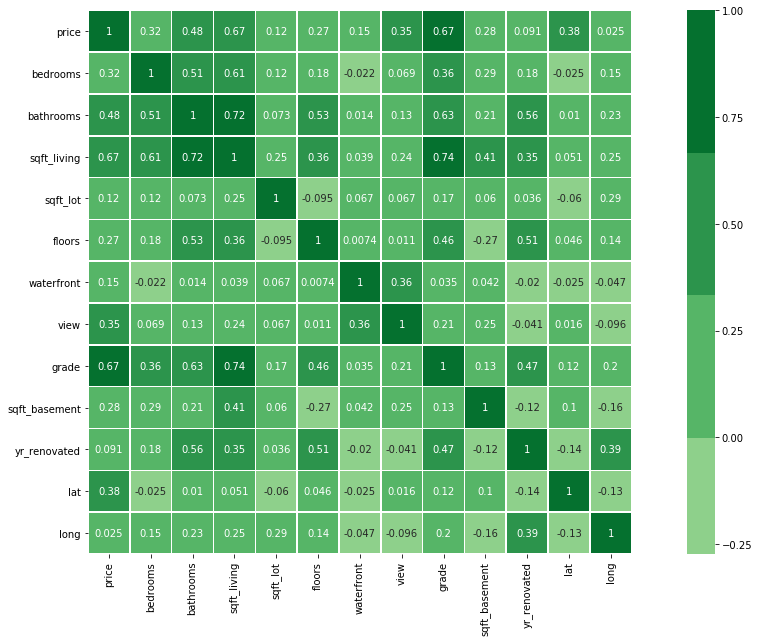

In [8]:
#heatmap
plt.figure(figsize=(20,10))
ax= sns.heatmap(df_clean.corr(), annot=True, cmap=sns.color_palette('Greens'), center=0, linewidths=.5, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [9]:
df_clean.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.668374
sqft_living      0.665514
bathrooms        0.477295
lat              0.379673
view             0.350012
bedrooms         0.318814
sqft_basement    0.284592
floors           0.273651
waterfront       0.154395
sqft_lot         0.119918
yr_renovated     0.090887
long             0.024731
Name: price, dtype: float64

### PERFECT ! 
#### everything sounds reliable for now. we can also drop columns of "yr_renovated" and "long" as they have almost no effect on the price.

# 2aa) checking for the linearity of  predictors:

Linearity assumption requires that there should be a linear relationship between the response variable (Y) and predictor (X). Scatterplots can show whether there is a linear or non-linear relationship.

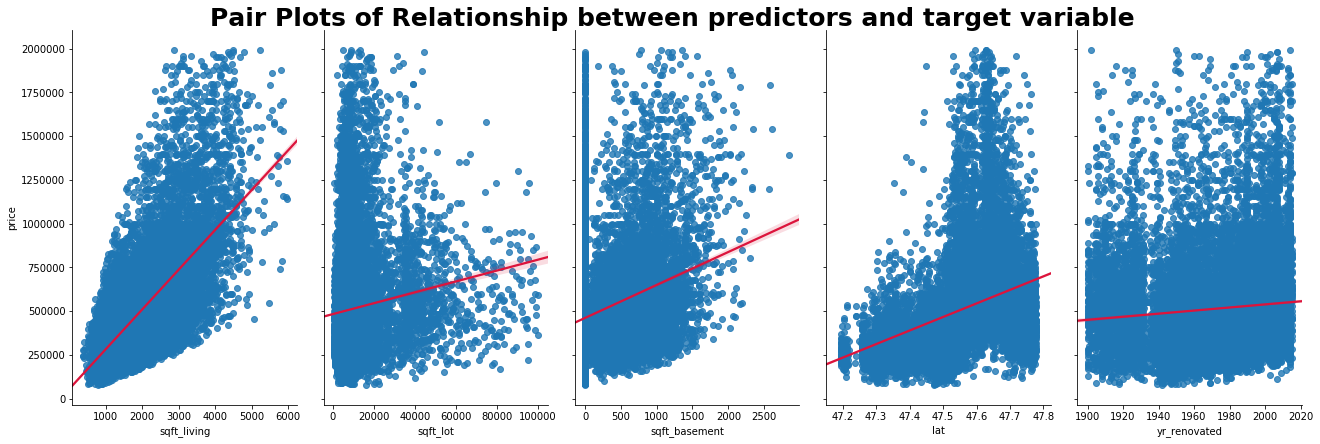

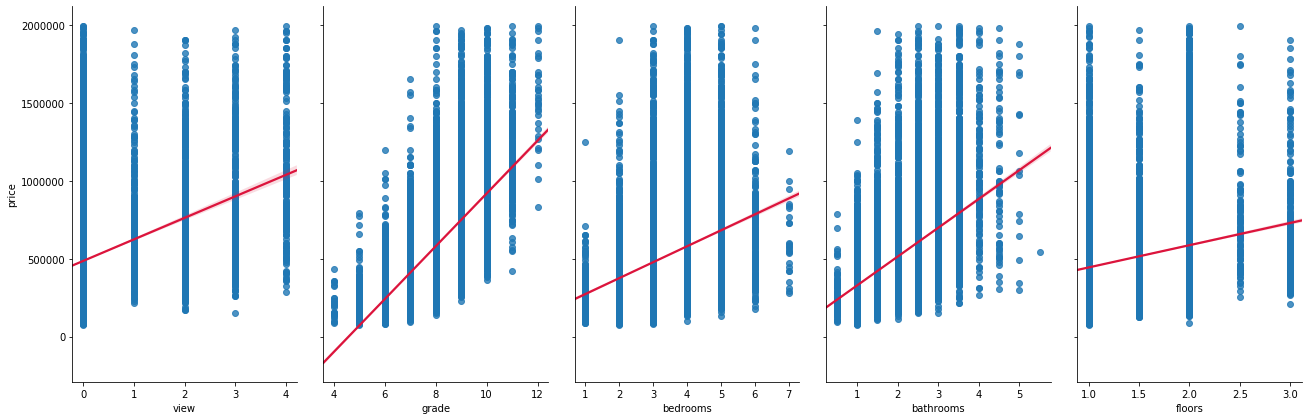

In [10]:
sns.pairplot(x_vars=['sqft_living','sqft_lot','sqft_basement','lat','yr_renovated'], 
             y_vars='price', data=df_clean, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.6)

plt.suptitle('Pair Plots of Relationship between predictors and target variable', size=25, weight='bold', y=1.02)

sns.pairplot(x_vars=['view','grade','bedrooms','bathrooms','floors'], 
             y_vars='price', data=df_clean, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.6)

plt.show();

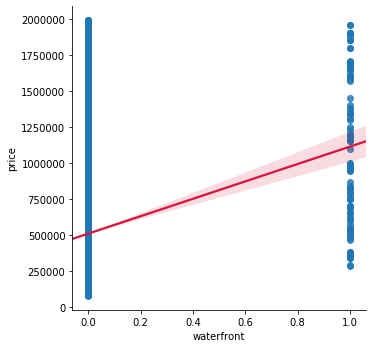

In [11]:
sns.pairplot(x_vars=['waterfront'], 
             y_vars='price', data=df_clean, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=5, aspect=1)

# 2b) checking the distribution of predictors:

after all changes we have made to the data set, let's look at the distributions of the dependent and independent numeric variables.

**NOTE**: Observing normality here does NOT necessarily mean your normality assumption is fulfilled! You just generally want to check out the distribution of your variables before starting to build a model. You'll verify the normality assumption later by checking the distribution of the residuals after building the model.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000EC216AACC8>,
      dtype=object)

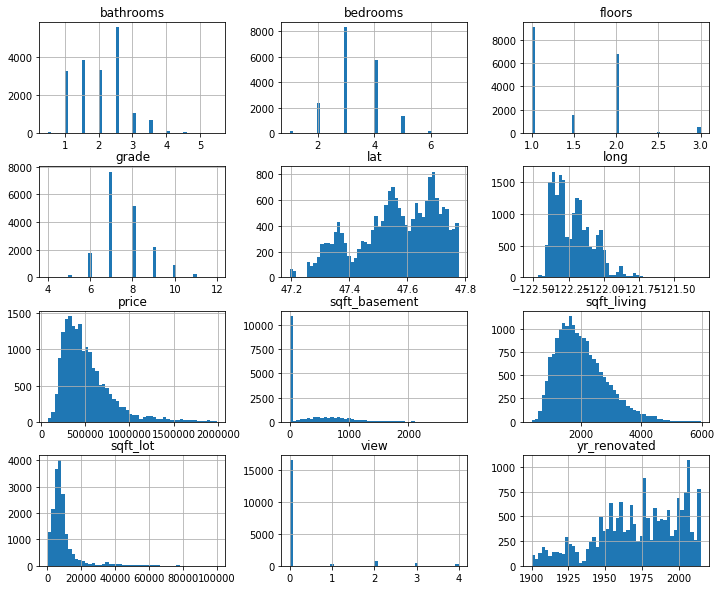

In [12]:
#create a subset of features:
subset=['price','grade','sqft_living', "bathrooms",'lat',"view","bedrooms",
        "sqft_basement","floors",'sqft_lot',"long",'yr_renovated']

#histogram
df_clean[subset].hist(bins= 50, figsize  = [12, 10])


#df_clean.hist(figsize  = [15, 8])
#pd.plotting.scatter_matrix(df_clean, figsize=(20,20))
#plt.show()

## observations:

### our features, there are few non-normally distributed, so we have to first transform their values and make them normally distributed before further working towards building a model.

## to keep consistancy, we need to apply one method of transformation to the dataset, thus we need to find the best transformation method.

## 1. Log Transformation: 
> we have some features with 0 values,"sqft_basement" and "view". Log transformation does not work on zero values beacause it creates an infinite digit for zero. 
>we have one feature with negative values "log", but this feature is very low corr and has way small effect on our target "price", so we can just ignore this feature as we probably do not use it in the model.

## 2. Square root transformation:
> this is another common transformation method that can work with 0 as well as positive values, but its not as strong as log transfer.

### which transformation to work with?
Log transformation has a stonger impact on normalizing the distribution, also we can also use log(x+1) transformation to transform 0 az well as other values:
df_log = df[to_log].applymap(lambda x: np.log(x+1))

we are going to test both transformation in a few features and see how different is the impact to get to the final decision.

Lets work on a **"sqft_lot"** feature and transform it through **Log, log(x+1) and square root transformation** and observe the results, because each transformation create a new scale for the feature we can not use multiple kde plots to compare the differences and have to do it one by one.

#### The easiest way to check for distribution comparison is with histograms, **Kernel Density Estimate plot (KDE)**: 

## original distribution

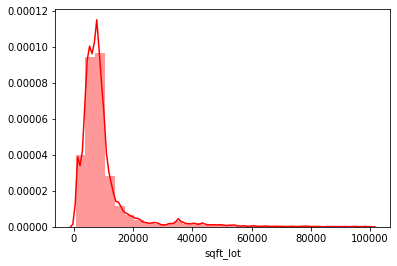

In [13]:
#sqrt_lot
#create a copy of the dataframe
df_clean1=df_clean.copy(deep=True)
sns.distplot(df_clean["sqft_lot"], bins=30, kde=True, rug=False, color="red")

## log transfer

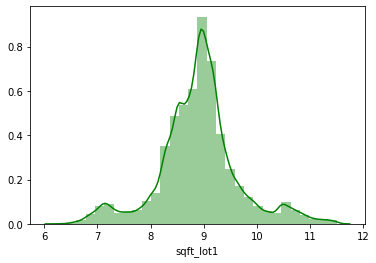

In [14]:
#create a copy of feature in original data frame to play with:
df_clean1["sqft_lot1"]=df_clean["sqft_lot"]
df_clean1["sqft_lot1"] = np.log(df_clean1["sqft_lot1"])
sns.distplot(df_clean1["sqft_lot1"], bins=30, kde=True, rug=False, color="green")

## log(x+1) transfer

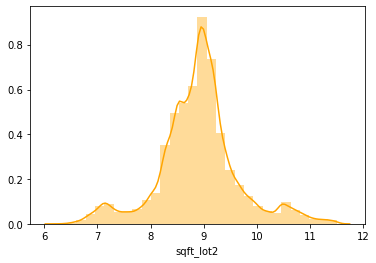

In [15]:
#create a copy of feature in original data frame to play with:
df_clean1["sqft_lot2"]=df_clean["sqft_lot"]
df_clean1["sqft_lot2"] = df_clean1["sqft_lot2"].apply(lambda x: np.log(x+1))
sns.distplot(df_clean1["sqft_lot2"], bins=30, kde=True, rug=False, color="orange")

## square root transfer

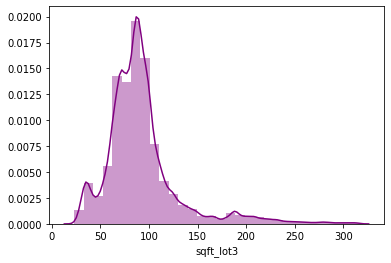

In [16]:
#create a copy of feature in original data frame to play with:
df_clean1["sqft_lot3"]=df_clean["sqft_lot"]
df_clean1["sqft_lot3"] = np.sqrt(df_clean1["sqft_lot3"])
sns.distplot(df_clean1["sqft_lot3"], bins=30, kde=True, rug=False, color="purple")

### as we can see:

#### 1. the log and log+1 transfer for the feature without zero doesnt make a big difference.
#### 2. the log transfer better affects the distribution of data.

### so, we decide to use log transfer for all our required features.

another interesting example can be **"sqft_basement** as it also has zero.
## original distribution

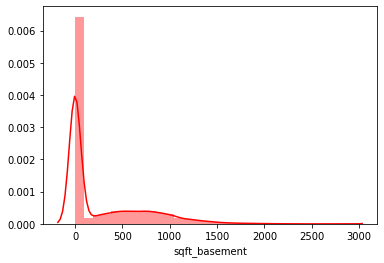

In [17]:
#sqft_basement
# create a copy of dataframe:
df_clean2=df_clean.copy(deep=True)
sns.distplot(df_clean1["sqft_basement"], bins=30, kde=True, rug=False, color="red")

## log transfer

In [18]:
#df_clean1["sqft_basement1"]=df_clean["sqft_basement"]
#df_clean1["sqft_basement1"] = np.log(df_clean1["sqft_basement1"])
#sns.distplot(df_clean1["sqft_basement1"], bins=30, kde=True, rug=False, color="green")

#************************************* it gives us an error because log 0 is not finite *********************************** 

## log(x+1) transfer

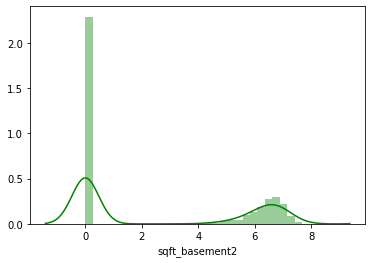

In [19]:
df_clean1["sqft_basement2"]=df_clean["sqft_basement"]
df_clean1["sqft_basement2"] = df_clean1["sqft_basement2"].apply(lambda x: np.log(x+1))
sns.distplot(df_clean1["sqft_basement2"], bins=30, kde=True, rug=False, color="green")

## square root transfer

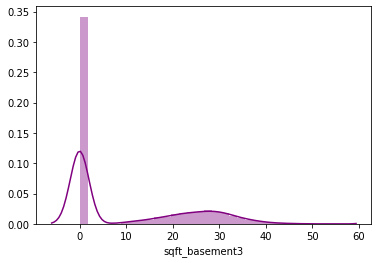

In [20]:
df_clean1["sqft_basement3"]=df_clean["sqft_basement"]
df_clean1["sqft_basement3"] = np.sqrt(df_clean1["sqft_basement3"])
sns.distplot(df_clean1["sqft_basement3"], bins=30, kde=True, rug=False, color="purple")

# 2ba) apply log transfer to all non-categorical features:

1. subset of non-categorical features:
['price' ,'sqft_living', 'lat', 'sqft_basement', 'sqft_lot', 'long', 'yr_renovated', 'view', 'bedrooms', 'bathrooms', 'floors', 'grade']

>**'sqft_basement'** and **view** has zero values and
>**'long'** has negative values. we will take the target **'price'** off after normalizing the distributions.

2. subset of categorical features:
['waterfront']

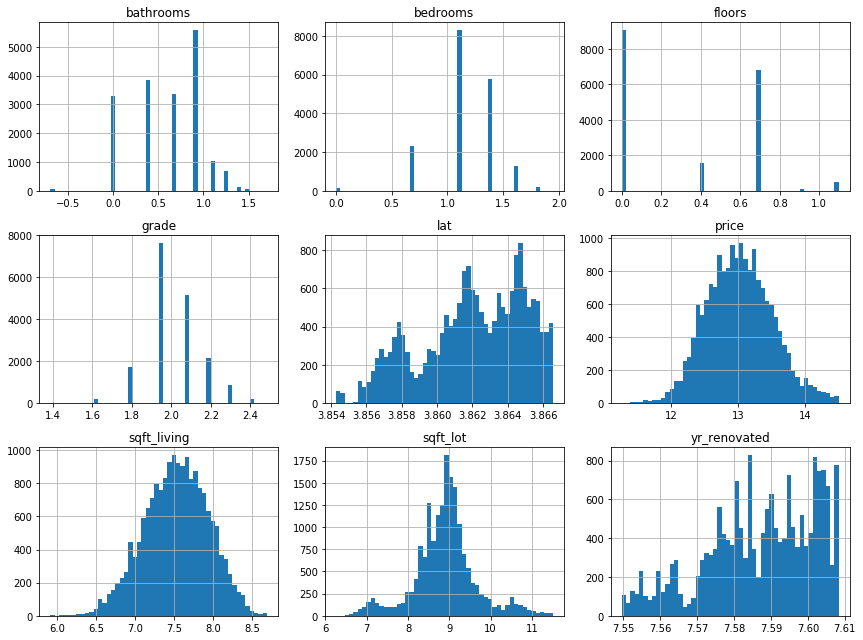

In [24]:
# creating a new DataFrame for log-transformations
df_clean_log = pd.DataFrame([])

# log-transforming for non-categorical features besides 'sqft_basement' and 'long' 
subset1= ['price','sqft_living','lat','sqft_lot','yr_renovated','bedrooms','bathrooms','floors','grade']

for column in df_clean[subset1]:
    df_clean_log[column] = np.log(df_clean[subset1][column])

#histogram
fig = df_clean_log.hist(bins=50, figsize=(12,9), grid=True)
plt.tight_layout();

## observations:

ok, they look better now:

**"yr_renovated"** and **"long"** has way less effect on out target feature(price), so we dont need to work further on them because we probably are not going to use them in model.

**"sqft_basement'** has zero and should be transformed by Log(x+1) transform.

**"lat"** still is not completely normally-distributed. 

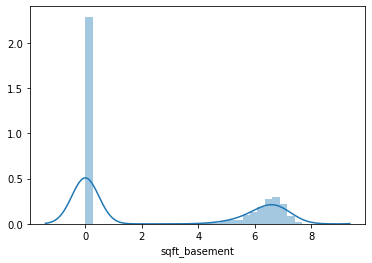

In [25]:
# sqft_basement
df_clean_log["sqft_basement"] = df_clean["sqft_basement"].apply(lambda x: np.log(x+1))
sns.distplot(df_clean_log["sqft_basement"], bins=30, kde=True, rug=False)

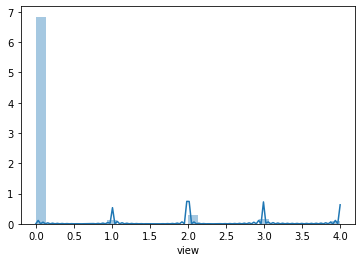

In [29]:
# View
df_clean_log["view"] = df_clean["view"].apply(lambda x: np.log(x+1))
sns.distplot(df_clean1["view"], bins=30, kde=True, rug=False)

#### the other option is to convert the basement feature into a categorical feature with 2 categories: with or without basement.

In [30]:
df_clean_log

,price,sqft_living,lat,sqft_lot,yr_renovated,bedrooms,bathrooms,floors,grade,sqft_basement,view
1,13.195614,7.851661,3.865372,8.887653,7.596392,1.098612,0.693147,0.693147,1.945910,5.993961,0.0
2,12.100712,6.646391,3.865726,9.210340,7.566828,0.693147,0.000000,0.000000,1.791759,0.000000,0.0
3,13.311329,7.580700,3.861168,8.517193,7.583248,1.386294,1.098612,0.000000,1.945910,6.814543,0.0
4,13.142166,7.426549,3.863186,8.997147,7.594381,1.098612,0.693147,0.000000,2.079442,0.000000,0.0
7,12.583995,6.966024,3.858823,9.181015,7.582229,1.098612,0.405465,0.000000,1.945910,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
21591,13.071070,7.177782,3.862356,7.165493,7.604894,1.098612,0.916291,0.693147,2.079442,4.875197,0.0
21592,12.793859,7.333023,3.864917,7.030857,7.605392,1.098612,0.916291,1.098612,2.079442,0.000000,0.0
21593,12.899220,7.745003,3.860955,8.667852,7.607878,1.386294,0.916291,0.693147,2.079442,0.000000,0.0
21594,12.904459,6.927558,3.862715,7.207860,7.605392,0.693147,-0.693147,0.693147,1.945910,0.000000,0.0


(11.0, 0.0)

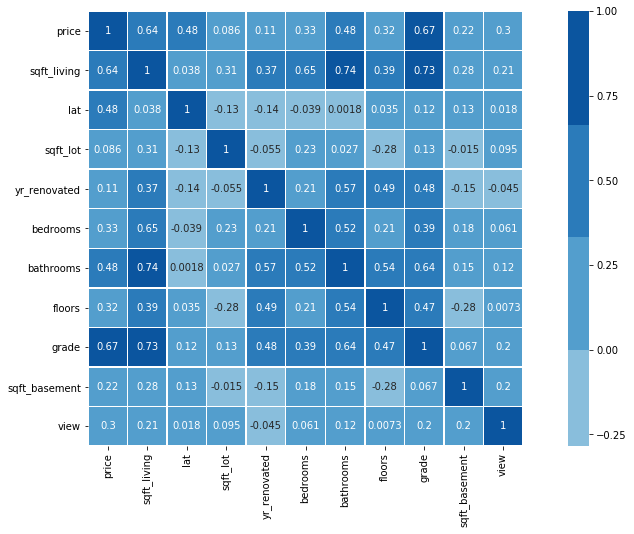

In [31]:
#checking heatmap after scaling:
plt.figure(figsize=(16,8))
ax= sns.heatmap(df_clean_log.corr(), annot=True, cmap=sns.color_palette('Blues'), center=0, linewidths=.5, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# 2bb) Feature scaling:

Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing to scale/normalize the range of features of data before building the model.

1. mean-normalization method

2. min-max scalling method: data will be within a range of [0, 1] 

we are going to use min-max scaling for our **non-categorical** features, before movining to next step.

**NOTE**:
For Categorical data: after we create dummy variables for categorical data, all our dummy variables will be 0 or 1, so for categorical variables we alresdy have all the columns in the range of 0 and 1! 


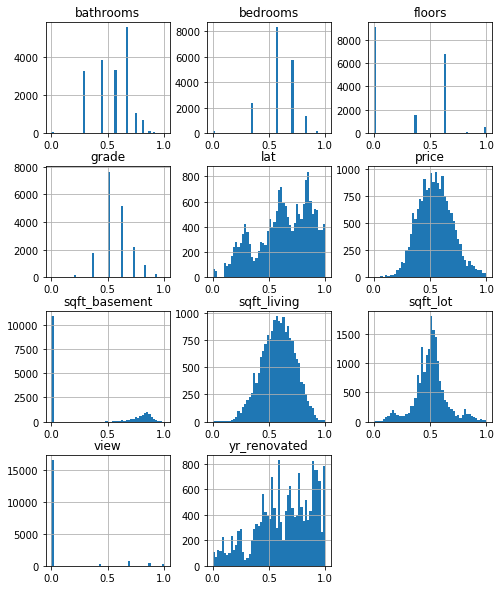

In [32]:
## min-max scaling for all non-categorical features after log transformation:
df_clean_log_scaled = pd.DataFrame([])
for column in df_clean_log.columns:
    x = df_clean_log[column]
    df_clean_log_scaled[column] = (x-min(x)) / (max(x)-min(x))
    
# display the histograms to check the results
df_clean_log_scaled.hist(bins=50, figsize=(8,10), grid=True);

In [34]:
df_clean_log_scaled

,price,sqft_living,lat,sqft_lot,yr_renovated,bedrooms,bathrooms,floors,grade,sqft_basement,view
1,0.596185,0.697349,0.903452,0.500893,0.796101,0.564575,0.578130,0.63093,0.509384,0.753443,0.0
2,0.258166,0.263693,0.932292,0.562261,0.293018,0.356207,0.289065,0.00000,0.369070,0.000000,0.0
3,0.631908,0.599857,0.561032,0.430440,0.572419,0.712414,0.747222,0.00000,0.509384,0.856591,0.0
4,0.579684,0.544394,0.725409,0.521716,0.761879,0.564575,0.578130,0.00000,0.630930,0.000000,0.0
7,0.407366,0.378697,0.370041,0.556684,0.555090,0.564575,0.458157,0.00000,0.509384,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
21591,0.557735,0.454888,0.657815,0.173378,0.940781,0.564575,0.671188,0.63093,0.630930,0.612814,0.0
21592,0.472155,0.510743,0.866406,0.147773,0.949254,0.564575,0.671188,1.00000,0.630930,0.000000,0.0
21593,0.504682,0.658973,0.543719,0.459092,0.991553,0.712414,0.671188,0.63093,0.630930,0.000000,0.0
21594,0.506299,0.364857,0.687084,0.181435,0.949254,0.356207,0.000000,0.63093,0.509384,0.000000,0.0


(11.0, 0.0)

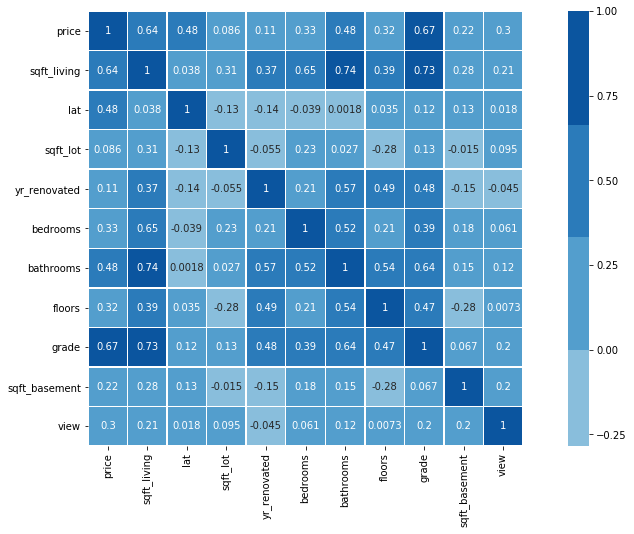

In [35]:
#checking heatmap after log transfer and scaling:
plt.figure(figsize=(16,8))
ax= sns.heatmap(df_clean_log_scaled.corr(), annot=True, cmap=sns.color_palette('Blues'), center=0, linewidths=.5, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Great ! we have a new version of the dataframe, with our transformed and scaled features.
**df_clean_log_scaled** now we are ready to move to the next step which is dealing with categorical feature.

# 2c) Creating dummy variables for categorical data:

### ['waterfront']

Before we build the model, we need to create dummy variables for our categorical variables. when we are working with categorical variables the information of the last category has already been underestood by the model through the information of N-1 categories before, so to avoid multicolinearity in such cases(its called dummy variables trap), In general, if you have a categorical feature with N levels, you create N-1 dummy variables.

to create dummy variables for categorical data, we can either use:

1. sklearn.preprocessing.LabelEncoder & sklearn.preprocessing.OneHotEncoder. 

2. pd.get_dummies. 

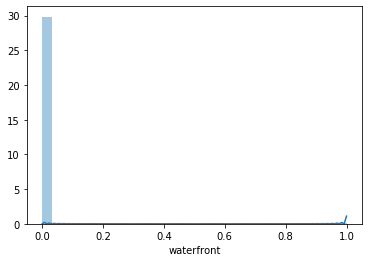

In [36]:
#waterfront
sns.distplot(df_clean["waterfront"], bins=30, kde=True, rug=False)

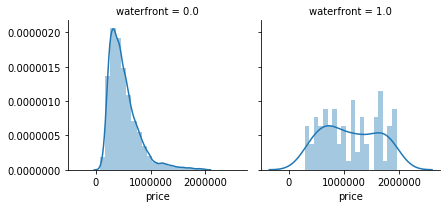

In [38]:
#observe the distribution of the price based on waterfront categories:
g = sns.FacetGrid(df_clean, col="waterfront", margin_titles=True, height=3, col_wrap=3)
g = g.map(sns.distplot , "price", bins=20)

In [39]:
#create dummy variables for waterfront feature:
waterfront_dummy=pd.get_dummies(df_clean.waterfront,prefix='waterfront')
waterfront_dummy

,waterfront_0.0,waterfront_1.0
1,1,0
2,1,0
3,1,0
4,1,0
7,1,0
...,...,...
21591,1,0
21592,1,0
21593,1,0
21594,1,0


In [40]:
# to avoild molticolinearity for dummy variables, we have to create n-1 dummy variables for n categories:
waterfront_dummy_clean= pd.get_dummies(df_clean.waterfront,prefix='waterfront',drop_first=True)
waterfront_dummy_clean

,waterfront_1.0
1,0
2,0
3,0
4,0
7,0
...,...
21591,0
21592,0
21593,0
21594,0


 ### concatenate the dummy variable columns onto the original dataframe:

In [140]:
# concatenate the dummy variable columns onto the original dataframe
df_final = pd.concat([df_clean_log_scaled,waterfront_dummy_clean], axis=1)
df_final.head(2)

,price,sqft_living,lat,sqft_lot,yr_renovated,bedrooms,bathrooms,floors,grade,sqft_basement,view,waterfront_1.0
1,0.596185,0.697349,0.903452,0.500893,0.796101,0.564575,0.578130,0.63093,0.509384,0.753443,0.0,0
2,0.258166,0.263693,0.932292,0.562261,0.293018,0.356207,0.289065,0.00000,0.369070,0.000000,0.0,0


### Great, now we have one clean,loged,scaled, dummy generated dataframe to create the linear model: df_final

(12.0, 0.0)

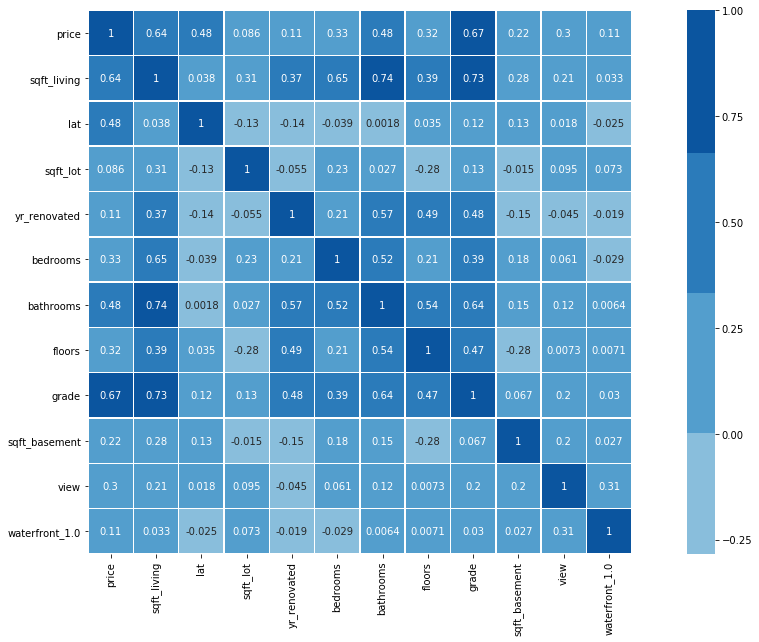

In [141]:
#checking heatmap after log transfer and scaling and generating dummy variables:
plt.figure(figsize=(20,10))
ax= sns.heatmap(df_final.corr(), annot=True, cmap=sns.color_palette('Blues'), center=0, linewidths=.5, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# 3. Feature selection:

Feature Selection is the process of selecting out the most significant features from a given dataset. In many of the cases, feature Selection can enhance the performance of a model as well, filter methods are generally used as a data preprocessing step.

we are going to use **scikit learn feature ranking** to see which features give the best p-values, a p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis.


### 3a) Feature ranking with recursive feature elimination RFE :

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

### Train / Test Split:

For scikit learn feature ranking we need the training set of data, so first we split the data into a training set and test set.

In [144]:
#y is the target feature
y = df_final['price']

#features is the dataframe of the features
X = df_final.drop(['price'], axis=1)

#These are my training and test sets of data.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [145]:
#Feature ranking with scikit learn:
#selector = RFE(estimator, step=1, min_features_to_select=1, verbose=0)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

selector = RFE(linreg, n_features_to_select=1)
selector = selector.fit(X,y)
estimators = selector.estimator_

#Store the results or feature ranking into a list of tuples. Then sort them by rank:
features_ranked = zip(X.columns,selector.ranking_)
sorted_features = sorted(features_ranked, key=lambda tup: tup[1])

#Iterate through sorted features and print their rank:
for col, rank in sorted_features:
    print("{}. {}".format(rank,col))

1. grade
2. sqft_living
3. lat
4. waterfront_1.0
5. yr_renovated
6. view
7. bathrooms
8. bedrooms
9. sqft_lot
10. floors
11. sqft_basement


### 3b) we can also run an **initial linear regression** and check the estimated coefficients to decide on the final features:

In [146]:
#y is the target feature
y = df_final['price']

#features is the dataframe of the features
X = df_final.drop(['price'], axis=1)

# fit the model
lm = LinearRegression()
lm.fit(X, y)

# pair the feature names with the coefficients into a dataframe
pd.DataFrame(list(zip(X, lm.coef_)), columns=['Features', 'Estimated Coefficient'])

,Features,Estimated Coefficient
0,sqft_living,0.403581
1,lat,0.249995
2,sqft_lot,-0.036774
3,yr_renovated,-0.124979
4,bedrooms,-0.059686
5,bathrooms,0.058046
6,floors,0.019204
7,grade,0.448533
8,sqft_basement,0.000415
9,view,0.079837


In [147]:
df_final.corr()['price'].sort_values(ascending=False)

price             1.000000
grade             0.665853
sqft_living       0.643054
lat               0.481852
bathrooms         0.480556
bedrooms          0.326996
floors            0.315101
view              0.304353
sqft_basement     0.224209
waterfront_1.0    0.113521
yr_renovated      0.108504
sqft_lot          0.086211
Name: price, dtype: float64

### 3c) we can also run an **initial OLS regression** and check the p-values and R^2 to decide on the final features:
In general, the higher the R-squared, the better the model fits your data, it shows that the differences between the observed values and the model's predicted values are small and unbiased.

In [149]:
import statsmodels.api as sm

#y is the target feature
y = df_final['price']

#features is the dataframe of the features
X = df_final.drop(['price'], axis=1)

# add an intercept (beta_0) to our model
X = sm.add_constant(X) 

# fit the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     4402.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        02:23:39   Log-Likelihood:                 20031.
No. Observations:               18050   AIC:                        -4.004e+04
Df Residuals:                   18038   BIC:                        -3.994e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0174      0.004     -4.300      0.000      -0.025      -0.009
sqft_living        0.4036      0.009     43.901      0.000       0.386       0.422
lat                0.2500      0.003     93.810      0.000       0.245       0.255
sqft_lot          -0.0368      0.005     -6.875      0.000      -0.047      -0.026
yr_renovated      -0.1250      0.003    -38.955      0.000      -0.131      -0.119
bedrooms          -0.0597      0.006    -10.571      0.000      -0.071      -0.049
bathrooms          0.0580      0.007      8.816      0.000       0.045       0.071
floors             0.0192      0.003      6.639      0.000       0.014       0.025
grade              0.4485      0.007     60.410      0.000       0.434       0.463
sqft_basement      0.0004      0.002      0.213      0.831      -0.003       0.004
view               0.0798      0.003     25.577      0.000       0.074       0.086
waterfront_1.0     0.1295      0.009     14.843      0.000       0.112       0.147
==============================================================================
Omnibus:                      464.794   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              897.180
Skew:                           0.185   Prob(JB):                    1.51e-195
Kurtosis:                       4.028   Cond. No.                         35.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-squared** is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. ... 100% indicates that the model explains all the variability of the response data around its mean. 
our R squared is almost 70% which is not a bad result.

##### Observation:

### based on our initial OLS regression:

1. our skew is 0.185, -0.5<skew<0.5 so our distributions are approximately symmetric.
2. our kurtosis is 4 > 3, so our distributions are not totally normal.
3. our p-values are samaller than 0.05 
4. our R^2 is almost 73% which is acceptable.
5. cond No is 35 which is low and indicates that we do not any significant molticolinearity.
6. so the only problem is the small cor coefficients which can be solved by a better feature selection.

In [152]:
# lets change the features based on our observations:
features = ['grade','sqft_living','waterfront_1.0','lat','yr_renovated']

#y is the target feature
y = df_final['price']

#x is predictor features 
X = df_final[features]
X

,grade,sqft_living,waterfront_1.0,lat,yr_renovated
1,0.509384,0.697349,0,0.903452,0.796101
2,0.369070,0.263693,0,0.932292,0.293018
3,0.509384,0.599857,0,0.561032,0.572419
4,0.630930,0.544394,0,0.725409,0.761879
7,0.509384,0.378697,0,0.370041,0.555090
...,...,...,...,...,...
21591,0.630930,0.454888,0,0.657815,0.940781
21592,0.630930,0.510743,0,0.866406,0.949254
21593,0.630930,0.658973,0,0.543719,0.991553
21594,0.509384,0.364857,0,0.687084,0.949254


In [153]:
# add an intercept (beta_0) to our model
X = sm.add_constant(X) 

# fit the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

#OR OLS Regression and Model summary
#X_ols = X
#X_int = sm.add_constant(X_ols)
#model = sm.OLS(y,X_int).fit()
#model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     8886.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        02:25:19   Log-Likelihood:                 19470.
No. Observations:               18050   AIC:                        -3.893e+04
Df Residuals:                   18044   BIC:                        -3.888e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0689      0.003    -21.379      0.000      -0.075      -0.063
grade              0.5001      0.007     67.817      0.000       0.486       0.515
sqft_living        0.3992      0.006     65.658      0.000       0.387       0.411
waterfront_1.0     0.2004      0.009     23.505      0.000       0.184       0.217
lat                0.2559      0.003     95.113      0.000       0.251       0.261
yr_renovated      -0.1115      0.003    -39.004      0.000      -0.117      -0.106
==============================================================================
Omnibus:                      371.224   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              658.869
Skew:                           0.165   Prob(JB):                    8.48e-144
Kurtosis:                       3.876   Cond. No.                         22.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sounds better, r-squared and coefs are becoming higher and kurtosis is becoming closer to 3. lets try a few more combination.
### after trying different combinations, we got to the final point that the below combination of predictors are the best combination for our model.
####  **['grade' ,'sqft_living', 'waterfront_1.0', 'lat', 'yr_renovated']**
### Here is our **final model** and price equation :

In [215]:
#final model:
features = ['grade','sqft_living','waterfront_1.0','lat','yr_renovated']

#y is the target feature
y = df_final['price']

#x is predictor features 
X = df_final[features]

#These are my training and test sets of data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14440, 5)
(3610, 5)
(14440,)
(3610,)


In [218]:
#linear regression final model
features = ['grade','sqft_living','waterfront_1.0','lat','yr_renovated']

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

#intercept 
print('intercept:',lm.intercept_)

#coefficients
#pair the feature names with the coefficients into a dataframe
pd.DataFrame(list(zip(X_train, lm.coef_)), columns=['Features', 'Estimated Coefficient'])

intercept: -0.06702880558695556


,Features,Estimated Coefficient
0,grade,0.502202
1,sqft_living,0.394811
2,waterfront_1.0,0.204677
3,lat,0.255748
4,yr_renovated,-0.112450


# 5. Validating the model

### 5a) Regression Model Validation(sklearn):

Lets look at the residuals and calculate the MSE for training and test sets:

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [234]:
# print R²
print("Estimated R²:",lm.score(X_train,y_train))

Estimated R²: 0.708119005217263


our model has r-squared of 70% which is a resonable result and shows a good fit.

In [244]:
# apply the model to predict prices for training and test data
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

# calculate residuals
train_residuals = y_pred_train - y_train
test_residuals = y_pred_test - y_test

# calculate Mean absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("MAE Train Set:", mae_train) 
print("MAE Test Set :", mae_test,'\n')

# calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("MSE Train Set:", mse_train) 
print("MSE Test Set :", mse_test,'\n')

# calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("RMSE Train Set:", rmse_train)
print("RMSE Test Set:", rmse_test,'\n')

# calculate standard deviation of response variable
#print("StD Target:", df_final.price.std())

MAE Train Set: 0.06388652490908257
MAE Test Set : 0.06235095202942902 

MSE Train Set: 0.006845599447908268
MSE Test Set : 0.006472667091509154 

RMSE Train Set: 0.08273813780783483
RMSE Test Set: 0.08045288740318246 



**MSE** the average squared difference between the estimated values and the actual value.

**MAE** is the sum of absolute differences between our target and predicted variables. So it measures the average magnitude of errors in a set of predictions, without considering their directions.

**RMSE** Root Mean Square Error, is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are

#### our model MAE,MSE and RMSE are very low and there are not much difference between our train and test data set which indicates that the model fits well.

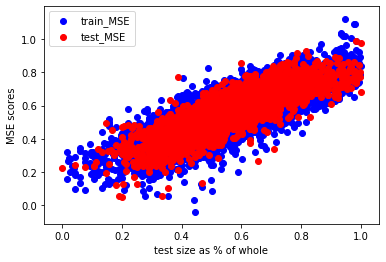

In [251]:
# plotting our results
plt.scatter(y_train, y_pred_train, color='blue', label="train_MSE")
plt.scatter(y_test, y_pred_test, color='red', label="test_MSE")
plt.legend()
plt.xlabel('test size as % of whole')
plt.ylabel('MSE scores')
plt.show()

### 5b) Regression Model Validation(OLS):

In [252]:
#OLS Regression and Model summary for training set:
X_ols = X_train
X_int = sm.add_constant(X_ols)
model = sm.OLS(y_train,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     7004.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        04:11:36   Log-Likelihood:                 15496.
No. Observations:               14440   AIC:                        -3.098e+04
Df Residuals:                   14434   BIC:                        -3.093e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0670      0.004    -18.499      0.000      -0.074      -0.060
grade              0.5022      0.008     60.818      0.000       0.486       0.518
sqft_living        0.3948      0.007     57.846      0.000       0.381       0.408
waterfront_1.0     0.2047      0.010     21.461      0.000       0.186       0.223
lat                0.2557      0.003     84.709      0.000       0.250       0.262
yr_renovated      -0.1125      0.003    -35.111      0.000      -0.119      -0.106
==============================================================================
Omnibus:                      292.603   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              522.618
Skew:                           0.159   Prob(JB):                    3.27e-114
Kurtosis:                       3.876   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\farnaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


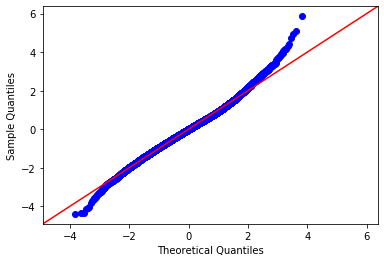

In [253]:
#Visualize error terms for training data set
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [254]:
#OLS Regression and Model summary for test set:
X_ols = X_test
X_int = sm.add_constant(X_ols)
model = sm.OLS(y_test,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     1889.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        04:18:10   Log-Likelihood:                 3978.3
No. Observations:                3610   AIC:                            -7945.
Df Residuals:                    3604   BIC:                            -7907.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0757      0.007    -10.764      0.000      -0.090      -0.062
grade              0.4916      0.016     29.991      0.000       0.460       0.524
sqft_living        0.4164      0.013     31.116      0.000       0.390       0.443
waterfront_1.0     0.1840      0.019      9.649      0.000       0.147       0.221
lat                0.2564      0.006     43.229      0.000       0.245       0.268
yr_renovated      -0.1079      0.006    -16.987      0.000      -0.120      -0.095
==============================================================================
Omnibus:                       77.976   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.247
Skew:                           0.186   Prob(JB):                     3.16e-29
Kurtosis:                       3.857   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\farnaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


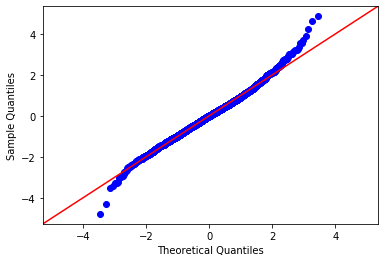

In [256]:
#Visualize error terms for test data set
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

### 5c) Observation and interpretations:

1. both sklearn and OLS linear regression model results, indicates that **our model is appropriately fit**, our main parameters of **skew**, **kurtosis** which indicate the normal distributions are in good range, **p-values** are all 0 which reject the null-hypothesis of our features, **R-Squared**,**MSE**,**RMSE**,**MAE** which shows the differences between predicted and actual values and how spread they are, are all in appropriate range. also there is not much difference between our training and test results which is another good sign.


2. Now we can answer the **First QUESTION** of which factors are the most effective on the housing price?? 

>Being waterfront or not.

>grade of the house,this is an overall grade given to the housing unit based on King County grading system.

>sqft_living = square footage of the home.

>being renovated or not or the year of the renovation. 

>location, the longtitude didnt show that much effect on the price but the lat = Latitude coordinate was an effective factor.
so this can be the answer of our **Second Question** of how location affects the price of housing in king county??

3. we can use the constant and coefficient of each factor to make the price equation and estimate the price, coefficients give us the statistical relationship between variables:

>Estimated_price= -0.067 + 0.5 Grade + 0.39 Sqft_living + 0.2 waterfront + 0.25 lat - 0.1 yr_renovated.